In [1]:
# 팀 명: SYT(So, your Tier?)
# 팀 원: 홍경인, 박현수
# 자 료: https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

tf.keras.backend.set_floatx('float64')

In [3]:
# 학습을 위한 챌린저 데이터, 테스트를 위한 마스터 데이터
# 파일 로드 후 학습에 관계 없는 'gameId' 삭제
# blueWins가 1이면 redWins는 무조건 0이기 때문에 학습에 방해되는 요소로 생각하여 삭제

# 트레이닝을 위한 파일
train_df = pd.read_csv('./Challenger_Ranked_Games.csv')
train_df_modi = train_df.drop('gameId', axis = 1)
train_df_modi = train_df_modi.drop('redWins', axis = 1)
train_df_corr = train_df_modi.corr(method = 'pearson')

# 테스트를 위한 파일
test_df = pd.read_csv('./Master_Ranked_Games.csv')
test_df_modi = test_df.drop('gameId', axis = 1)
test_df_modi = test_df_modi.drop('redWins', axis = 1)
test_df_corr = test_df_modi.corr(method = 'pearson')

In [4]:
# 학습 데이터의 column, row 출력

train_df_modi.shape

(26904, 48)

In [5]:
# 테스트 데이터의 column, row 출력

test_df_modi.shape

(107125, 48)

In [6]:
# 학습 데이터의 요소 별 상관관계 출력

train_df_corr

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,1.000000,-0.001414,-0.002982,0.055433,0.395313,0.079317,0.207592,0.480537,0.501499,0.431296,...,0.342904,0.686816,0.777556,0.903212,0.759482,0.759482,0.796047,0.335574,0.706917,0.635481
blueWins,-0.001414,1.000000,0.206442,0.449065,0.366722,0.267778,0.637521,0.466442,0.355048,0.708405,...,-0.356230,-0.173693,-0.270733,-0.083117,-0.215335,-0.215335,-0.231264,-0.411601,-0.222140,-0.548136
blueFirstBlood,-0.002982,0.206442,1.000000,0.209255,0.057685,0.133711,0.146766,0.135553,0.047449,0.182879,...,-0.102884,-0.061781,-0.090844,-0.030316,-0.057688,-0.057688,-0.056519,-0.143134,-0.043987,-0.147183
blueFirstTower,0.055433,0.449065,0.209255,1.000000,0.134875,0.195663,0.344918,0.286556,0.112454,0.466119,...,-0.140172,-0.067617,-0.120010,-0.006552,-0.053443,-0.053443,-0.110690,-0.227322,-0.047059,-0.309297
blueFirstBaron,0.395313,0.366722,0.057685,0.134875,1.000000,0.116563,0.424044,0.403234,0.880056,0.529667,...,-0.053746,0.172979,0.180171,0.373894,0.187407,0.187407,0.248108,-0.048145,0.164696,-0.005932
blueFirstDragon,0.079317,0.267778,0.133711,0.195663,0.116563,1.000000,0.163540,0.583926,0.108725,0.267873,...,-0.220561,-0.103301,-0.101245,0.101497,-0.095566,-0.095566,0.044032,-0.220627,-0.061352,-0.147350
blueFirstInhibitor,0.207592,0.637521,0.146766,0.344918,0.424044,0.163540,1.000000,0.410278,0.406364,0.779578,...,-0.084723,0.084859,0.035904,0.099550,0.083492,0.083492,-0.073133,-0.138384,0.008530,-0.295835
blueDragonKills,0.480537,0.466442,0.135553,0.286556,0.403234,0.583926,0.410278,1.000000,0.444917,0.616723,...,-0.167447,0.140064,0.165280,0.462640,0.164650,0.164650,0.309914,-0.173154,0.171047,-0.026545
blueBaronKills,0.501499,0.355048,0.047449,0.112454,0.880056,0.108725,0.406364,0.444917,1.000000,0.548118,...,0.004845,0.273853,0.282331,0.457296,0.269678,0.269678,0.336193,0.011595,0.260538,0.082552
blueTowerKills,0.431296,0.708405,0.182879,0.466119,0.529667,0.267873,0.779578,0.616723,0.548118,1.000000,...,-0.141336,0.157833,0.133442,0.334867,0.167931,0.167931,0.138624,-0.178901,0.131347,-0.161974


In [7]:
# 테스트 데이터의 요소 별 상관관계 출력

test_df_corr

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,1.000000,-0.020653,0.001113,0.046164,0.402575,0.091122,0.156593,0.494489,0.497172,0.391131,...,0.366323,0.693182,0.772841,0.900673,0.755967,0.755967,0.785703,0.376685,0.718363,0.627111
blueWins,-0.020653,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,0.723008,...,-0.332346,-0.173848,-0.275944,-0.109334,-0.221730,-0.221730,-0.247116,-0.397022,-0.220708,-0.557780
blueFirstBlood,0.001113,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,0.190511,...,-0.086768,-0.041774,-0.077770,-0.034696,-0.051810,-0.051810,-0.056249,-0.126558,-0.035060,-0.143356
blueFirstTower,0.046164,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,0.496109,...,-0.138609,-0.071147,-0.127329,-0.026023,-0.068079,-0.068079,-0.124301,-0.227451,-0.053142,-0.324156
blueFirstBaron,0.402575,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,0.528847,...,-0.038391,0.177221,0.185923,0.387670,0.191596,0.191596,0.250734,-0.028374,0.178618,-0.003921
blueFirstDragon,0.091122,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,0.300609,...,-0.218051,-0.098456,-0.099508,0.110429,-0.091008,-0.091008,0.054614,-0.214715,-0.055602,-0.141318
blueFirstInhibitor,0.156593,0.668425,0.157705,0.397007,0.410164,0.186230,1.000000,0.405637,0.385164,0.782831,...,-0.106175,0.039364,-0.021738,0.046620,0.021621,0.021621,-0.118942,-0.169300,-0.019547,-0.341737
blueDragonKills,0.494489,0.455406,0.136477,0.298754,0.441767,0.586899,0.405637,1.000000,0.474558,0.623088,...,-0.140576,0.154372,0.173743,0.476847,0.175815,0.175815,0.324852,-0.139044,0.193757,-0.009354
blueBaronKills,0.497172,0.355497,0.043951,0.124413,0.886130,0.123915,0.385164,0.474558,1.000000,0.540374,...,0.018866,0.270038,0.275772,0.460760,0.263059,0.263059,0.327136,0.027721,0.270974,0.077367
blueTowerKills,0.391131,0.723008,0.190511,0.496109,0.528847,0.300609,0.782831,0.623088,0.540374,1.000000,...,-0.131554,0.140620,0.101529,0.287993,0.129659,0.129659,0.096497,-0.163927,0.115631,-0.197478


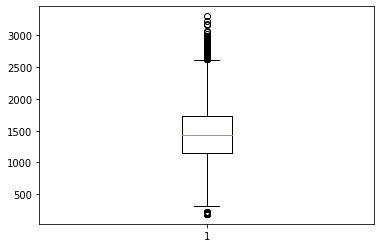

In [8]:
# Boxplot을 활용하여 학습 데이터의 평균 게임시간 출력

plt.boxplot(train_df_modi['gameDuraton'])
plt.show()

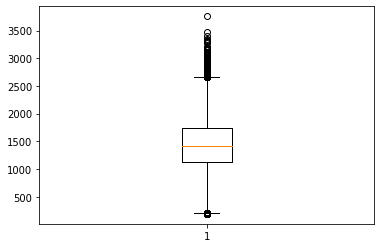

In [9]:
# Boxplot을 활용하여 테스트 데이터의 평균 게임시간 출력

plt.boxplot(test_df_modi['gameDuraton'])
plt.show()

In [10]:
# 학습 데이터의 게임시간 요소 중 학습에 방해가 될 수 있는 너무 짧은 게임시간과 너무 긴 게임시간에 대해 범위 설정

cond = (train_df_modi['gameDuraton'] <= 2500) & (train_df_modi['gameDuraton'] >= 300)
train_range_dCol = train_df_modi.loc[cond]

# 범위 설정 후 줄어든 row 수 확인
train_range_dCol

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,1837,1,1,0,0,1,0,3,0,5,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [11]:
# 테스트 데이터의 게임시간 요소 중 학습에 방해가 될 수 있는 너무 짧은 게임시간과 너무 긴 게임시간에 대해 범위 설정

test_cond = (test_df_modi['gameDuraton'] <= 2500) & (test_df_modi['gameDuraton'] >= 300)
test_range_dCol = test_df_modi.loc[test_cond]

# 범위 설정 후 줄어든 row 수 확인
test_range_dCol

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,2479,1,1,0,0,0,0,3,1,7,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,932,0,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,2081,0,1,1,0,0,0,1,0,6,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,1619,0,0,0,0,0,0,1,0,2,...,68,116262,59001,524,72,14.4,162,11,52292,60903


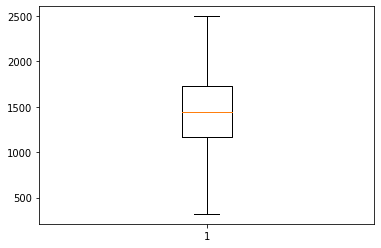

In [12]:
# 학습 데이터의 게임시간 범위 설정 후 boxplot 출력

plt.boxplot(train_range_dCol['gameDuraton'])
plt.show()

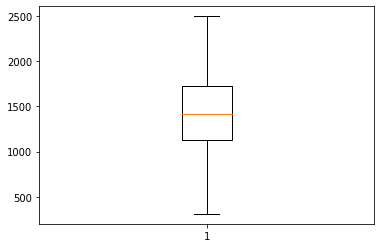

In [13]:
# 테스트 데이터의 게임시간 범위 설정 후 boxplot 출력

plt.boxplot(test_range_dCol['gameDuraton'])
plt.show()

In [14]:
# 학습 및 테스트 데이터의 목표인 'blueWins'를 타겟으로 설정

train_target = train_range_dCol.pop('blueWins')
test_target = test_range_dCol.pop('blueWins')

In [15]:
# 학습 및 테스트 데이터의 데이터를 데이터셋으로 만듬

train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_range_dCol.values, train_target.values)
)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_range_dCol.values, test_target.values)
)

In [16]:
# 효율적 학습을 위해 Epoch가 돌고난 뒤 섞음

train_dataset = train_dataset.shuffle(
    len(train_range_dCol)
).batch(1)
test_dataset = test_dataset.shuffle(
    len(test_range_dCol)
).batch(1)

In [17]:
# 신경망 모델링

def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
 ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [18]:
# 학습 데이터를 토대로 학습 시작

model = get_compiled_model()
model.fit(train_dataset, epochs=10)

Epoch 1/10
26394/26394 [==============================] - 17s 662us/step - loss: 36.9838 - accuracy: 0.9076- ETA: 12s - loss: 126.4045 - accuracy - ETA: 12s - loss: 118.1889 - accuracy:  - ETA: 12s - loss: 113.1753 -  - ETA: 11s - loss: 99.6033 - a - ETA: 10s - loss: 94.0746 - - ETA:  - ETA: 4s - loss: 48.3917 - acc - ETA: 3s - loss: 46.1603 - accur - ETA: 2s - loss: 44.4367 - accuracy: - ETA: 2s - loss: 43.3970 -  - ETA: 1s - loss: 41.1546 - accuracy: - ETA: 1s - los
Epoch 2/10
26394/26394 [==============================] - 18s 669us/step - loss: 0.3737 - accuracy: 0.8611
Epoch 3/10
26394/26394 [==============================] - 18s 674us/step - loss: 0.3897 - accuracy: 0.8618 15s - loss: 0.34 - ETA: 14s - los - ETA: 13s - loss: 0.403 - ETA: 12s - loss:  - ETA: 11s - loss: 0.3748 - accuracy: 0 - ETA: 10s - l - ETA: 9s - loss: 0.366 - ETA: 9s - loss: 0.3674 - 
Epoch 4/10
26394/26394 [==============================] - 18s 669us/step - loss: 0.4485 - accuracy: 0.8553 15s - loss: 0 - ETA:

In [19]:
# 테스트 데이터를 토대로 테스트 시작

loss, accuracy = model.evaluate(test_dataset)

# 가독성을 위해 손실률과 정확도 출력
print("손실률 :", loss)
print("정확도 :", accuracy)

104997/104997 [==============================] - 54s 519us/step - loss: 0.2037 - accuracy: 0.9193
손실률 : 0.203701874404552
정확도 : 0.9192643599340934
